# 批量 ATAC 测序

我们可以处理经过上游比对的 ATAC-seq 测序数据，并支持两种输入数据的格式：（1）使用比对 BAM 文件，
我们可以最大程度的保留原始数据的信息，我们推荐只要 BAM 文件可以获取，应尽可能采用它作为输入；
（2）BIGWIG 文件，对于一部分公共数据库中展示的数据，只有这种格式是可用的，由于统计时的约化操作，
BIGWIG 数据可能丢失了 BAM 中的部分信息，且一定丢失了序列信息

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import exprmat as em

em.setwd('/home/data/yangz/shared/tutorial/bulk-atac')
ver = em.version()

[i] exprmat 0.1.48 / exprmat-db 0.1.48
[i] os: posix (linux)  platform version: 5.15.0-139-generic
[i] loaded configuration from /home/data/yangz/.exprmatrc
[i] current working directory: /home/data/yangz/shared/tutorial/bulk-atac
[i] current database directory: /home/data/yangz/bioinfo/packages/database (0.1.48)
[i] resident memory: 809.58 MiB
[i] virtual memory: 5.78 GiB


在这个文档中，我们先演示如何从 BAM 文件读入 ATAC-seq 样本

In [6]:
! tree -sh ./src

./src
├── [2.3G]  control-1.bam
├── [2.3M]  control-1.bam.bai
├── [2.7G]  control-2.bam
├── [2.3M]  control-2.bam.bai
├── [2.3G]  control-3.bam
├── [2.3M]  control-3.bam.bai
├── [2.1G]  hp-1.bam
├── [2.3M]  hp-1.bam.bai
├── [2.3G]  hp-2.bam
├── [2.4M]  hp-2.bam.bai
├── [2.0G]  hp-3.bam
└── [2.3M]  hp-3.bam.bai

0 directories, 12 files


In [8]:
meta = em.metadata(
    locations    = [
        'src/control-1.bam',
        'src/control-2.bam',
        'src/control-3.bam',
        'src/hp-1.bam',
        'src/hp-2.bam',
        'src/hp-3.bam',
    ],
    modality     = ['atac-bulk'] * 6,
    default_taxa = ['hsa/grch38'] * 6,
    batches      = ['b-1'] * 6,
    names        = ['c1', 'c2', 'c3', 'e1', 'e2', 'e3'],
    groups       = ['control', 'control', 'control', 'expm', 'expm', 'expm'],
)

每个 ATAC-seq 样本均有一行模态为 atac-bulk 的元数据指定。对于 ATAC-seq 数据分析，比对基因组
的版本很重要，因为不同的基因组组装版本全局坐标几乎不会相同，因此，你需要指定你比对时使用的组装版本。
这个版本号在物种名后用 / 隔开，物种不同版本的参考基因组随软件包数据库安装，例如目前小鼠安装了名为
`grcm38` 和 `grcm39` 的组装以供选择

In [9]:
meta.dataframe

,location,sample,batch,group,modality,taxa
0,src/control-1.bam,c1,b-1,control,atac-bulk,hsa/grch38
1,src/control-2.bam,c2,b-1,control,atac-bulk,hsa/grch38
2,src/control-3.bam,c3,b-1,control,atac-bulk,hsa/grch38
3,src/hp-1.bam,e1,b-1,expm,atac-bulk,hsa/grch38
4,src/hp-2.bam,e2,b-1,expm,atac-bulk,hsa/grch38
5,src/hp-3.bam,e3,b-1,expm,atac-bulk,hsa/grch38


In [10]:
expm = em.experiment(meta, dump = 'bk-atac')

[i] reading sample c1 [atac-bulk] ...
[i] reading sample c2 [atac-bulk] ...
[i] reading sample c3 [atac-bulk] ...
[i] reading sample e1 [atac-bulk] ...
[i] reading sample e2 [atac-bulk] ...
[i] reading sample e3 [atac-bulk] ...


Bulk ATAC 数据表示为一个自动生成的 atac 模态对象，注意，它的 var 数目当前是 0，因为为了与单细胞
ATAC 数据格式兼容，这个 atac 模态对象的表达矩阵是分段计数矩阵，而对于批量 ATAC 测序数据而言，生成
这个矩阵没有太大意义

In [11]:
print(expm)

[!] dataset not integrated.
[*] composed of samples:
  bulk-atac   atac  hsa    batch autogen   of size 6 × 0



In [12]:
expm['atac']['bulk-atac'].uns['assembly.size']

,seqname,len
0,chr1,248956422
1,chr10,133797422
2,chr11,135086622
3,chr12,133275309
4,chr13,114364328
5,chr14,107043718
6,chr15,101991189
7,chr16,90338345
8,chr17,83257441
9,chr18,80373285


In [13]:
expm['atac']['bulk-atac'].obs

,n.fragments,pct.dup,pct.mito,location,sample,batch,group,modality,taxa
sample,,,,,,,,,
bulk-atac:c1,25596750,0.000264,0.0,src/control-1.bam,c1,b-1,control,atac-bulk,hsa/grch38
bulk-atac:c2,29933508,0.000356,0.0,src/control-2.bam,c2,b-1,control,atac-bulk,hsa/grch38
bulk-atac:c3,26024477,0.000272,0.0,src/control-3.bam,c3,b-1,control,atac-bulk,hsa/grch38
bulk-atac:e1,24406481,0.000328,0.0,src/hp-1.bam,e1,b-1,expm,atac-bulk,hsa/grch38
bulk-atac:e2,26010889,0.000294,0.0,src/hp-2.bam,e2,b-1,expm,atac-bulk,hsa/grch38
bulk-atac:e3,23710917,0.000301,0.0,src/hp-3.bam,e3,b-1,expm,atac-bulk,hsa/grch38


In [3]:
expm = em.load_experiment('bk-atac')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━ loading samples          1 / 1     (00:01 < 00:00)

[!] integrated mudata object is not generated.


### ATAC 数据的质量控制

我们可以直接使用与单细胞 ATAC 相同的图形观察 ATAC 测序质量

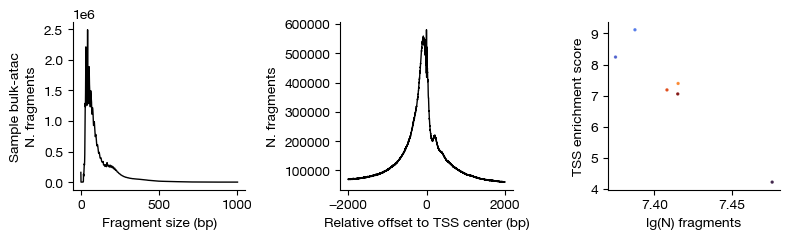

In [14]:
figs = expm.plot_atac_qc(run_on_samples = True)

### 峰检出

对于批量 ATAC 测序数据，我们不需要进行无监督聚类，因此，我们直接对样本进行峰检出操作。
我们对一组样本进行整合的峰检出，ATAC 峰表按照样本分组被导出到 uns 槽中

In [15]:
expm.run_atac_call_peaks(
    run_on_samples = ['bulk-atac'],

    # call peaks from fragments
    groupby = 'group',
    qvalue = 0.05,
    call_broad_peaks = False,
    broad_cutoff = 0.1,
    replicate = 'sample',
    replicate_qvalue = None,
    max_frag_size = 180,  # only call nucleosome-free fragments 
    selections = None,
    nolambda = False,
    shift = -100,
    extsize = 200,
    min_len = None,
    blacklist = None,
    
    # directly call groups of peaks
    key_added = 'peaks.group',
    inplace = True,
    n_jobs = 8
)

[i] exporting fragments ...
[i] calling peaks ...


我们根据预先设定的分组整合峰标注，如图所示

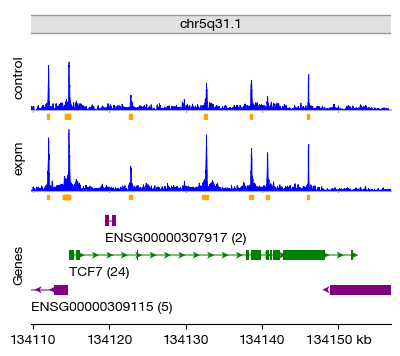

In [5]:
figs = expm.plot_atac_peaks(
    run_on_samples = ['bulk-atac'], group_key = 'group', peaks_key = 'peaks.group',
    # either specifying a gene name for convenience
    gene = 'TCF7', upstream = 5000, downstream = 5000, 
    # or specify chromosome coordinates manually
    chr = None, xf = None, xt = None, 
    figsize = (4, 3.5), dpi = 100, 
    gene_track_height = 0.4, chrom_track_height = 0.10,  
    peak_annotation_height = 0.1,
    min_frag_length = None, max_frag_length = 180,
    title = None, showgn = True
)

接下来，我们准备生成峰矩阵，因此我们需要所有样本可识别峰的交集，这一步成为峰的整合

#### 使用 IDR 整合峰

IDR 整合方法是 ENCODE 推荐的批量 ATAC 测序整合方法

In [6]:
expm.run_atac_merge_peaks(
    run_on_samples = ['bulk-atac'],
    key_added = 'peaks.merged',
    key_groups = 'peaks.group',  
    groupby = 'group',
    flavor = 'idr'
)

[i] merging peaks ...
[i] ranking peaks ...


我们观察整合峰的交集，整合峰绘制在基因座图的底部

In [7]:
expm['atac']['bulk-atac'].uns['peaks.merged']

,chr,start,end,strand,score,fc,p,q,summit,signal.x,signal.y
0,chr20,2101614,2103533,.,1025,7.587683,63.241371,60.665310,457,419.0,606.0
1,chr19,47273238,47275238,.,481,4.275474,37.156929,34.723652,383,134.0,347.0
2,chr5,138464000,138466031,.,1158,9.895336,626.924805,623.349915,196,158.0,1000.0
3,chr20,33993010,33994675,.,2000,22.268004,849.103821,845.262634,222,1000.0,1000.0
4,chr3,9396141,9397827,.,2000,6.767930,162.998184,160.120667,206,1000.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...
44503,chr4,15786800,15787259,.,55,2.565707,7.645530,5.579120,199,NaN,NaN
44504,chr8,63179767,63180248,.,54,3.018109,7.620480,5.465224,241,NaN,NaN
44505,chr9,97154891,97155469,.,52,3.000378,7.368090,5.221102,449,NaN,NaN
44506,chr5,37519258,37519720,.,50,2.879079,7.138310,5.003808,221,NaN,NaN


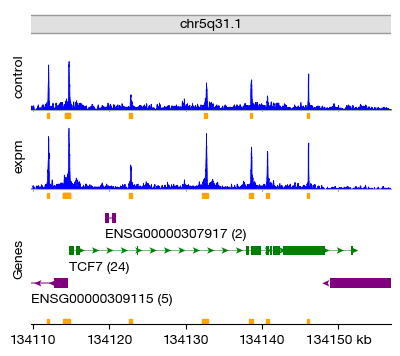

In [9]:
figs = expm.plot_atac_peaks(
    run_on_samples = ['bulk-atac'], group_key = 'group', peaks_key = 'peaks.group',
    # either specifying a gene name for convenience
    gene = 'TCF7', upstream = 5000, downstream = 5000, 
    # or specify chromosome coordinates manually
    chr = None, xf = None, xt = None, 
    figsize = (4, 3.5), dpi = 100, 
    gene_track_height = 0.4, chrom_track_height = 0.10,  
    peak_annotation_height = 0.1,
    min_frag_length = None, max_frag_length = 180,
    plot_consensus_peak = 'peaks.merged',
    title = None, showgn = True
)

#### 使用 SnapATAC 实现整合峰

SnapATAC 为单细胞 ATAC-seq 数据实现了一个高效的峰整合算法，其效能大致相同

In [10]:
expm.run_atac_merge_peaks(
    run_on_samples = ['bulk-atac'],
    key_added = 'peaks.merged',
    key_groups = 'peaks.group', 
    groupby = 'group',
    flavor = 'snapatac',
    half_width = 250
)

In [11]:
expm['atac']['bulk-atac'].uns['peaks.merged']

,expm,control,chr,start,end,strand,summit
0,True,True,chr1,9853,10354,.,250
1,True,True,chr1,15983,16484,.,250
2,True,True,chr1,181228,181729,.,250
3,True,True,chr1,180549,181050,.,250
4,True,True,chr1,191240,191741,.,250
...,...,...,...,...,...,...,...
48514,False,True,chrY,56706793,56707294,.,250
48515,True,True,chrY,56727895,56728396,.,250
48516,True,True,chrY,56734538,56735039,.,250
48517,True,True,chrY,56742463,56742964,.,250


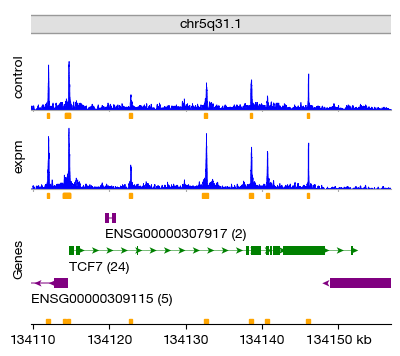

In [13]:
figs = expm.plot_atac_peaks(
    run_on_samples = ['bulk-atac'], group_key = 'group', peaks_key = 'peaks.group',
    # either specifying a gene name for convenience
    gene = 'TCF7', upstream = 5000, downstream = 5000, 
    # or specify chromosome coordinates manually
    chr = None, xf = None, xt = None, 
    figsize = (4, 3.5), dpi = 100, 
    gene_track_height = 0.4, chrom_track_height = 0.10,  
    peak_annotation_height = 0.1,
    min_frag_length = None, max_frag_length = 180,
    plot_consensus_peak = 'peaks.merged',
    title = None, showgn = True
)

### 生成峰矩阵和推断表达量矩阵

最后，我们根据整合峰计数剪切位点，形成峰矩阵，这会自动生成一个同名的 atac-p 模态。 通过 ATAC-seq
染色质可及性可以估计基因的转录活性，这将自动生成一个同名的 atac-g 模态。这个虚拟基因矩阵可以用于
与 RNA 测序的比对

In [14]:
expm.run_atac_make_peak_matrix(
    run_on_samples = ['bulk-atac'],
    chunk_size = 500,
    min_frag_size = None,
    max_frag_size = 180,
    counting_strategy = 'paired-insertion',
    value_type = 'target',
    summary_type = 'sum'
)

In [16]:
expm['atac-p']['bulk-atac'].var

,expm,control,chr,start,end,strand,summit
peak:grch38:chr1:9853-10354,True,True,chr1,9853,10354,.,250
peak:grch38:chr1:15983-16484,True,True,chr1,15983,16484,.,250
peak:grch38:chr1:181228-181729,True,True,chr1,181228,181729,.,250
peak:grch38:chr1:180549-181050,True,True,chr1,180549,181050,.,250
peak:grch38:chr1:191240-191741,True,True,chr1,191240,191741,.,250
...,...,...,...,...,...,...,...
peak:grch38:chrY:56706793-56707294,False,True,chrY,56706793,56707294,.,250
peak:grch38:chrY:56727895-56728396,True,True,chrY,56727895,56728396,.,250
peak:grch38:chrY:56734538-56735039,True,True,chrY,56734538,56735039,.,250
peak:grch38:chrY:56742463-56742964,True,True,chrY,56742463,56742964,.,250


删去可及性太低的峰

In [21]:
expm.run_atacp_filter_column_by_sum(run_on_samples = ['bulk-atac'], min_sum = 3)

In [22]:
print(expm)

[!] dataset not integrated.
[*] composed of samples:
  bulk-atac   atac   hsa    batch autogen   of size 6 × 0
  bulk-atac   atac-p hsa    batch autogen   of size 6 × 48519



### 保存数据集

现在保存我们做出的更改

In [23]:
expm.save()

[i] saving individual samples. (pass `save_samples = False` to skip)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━ modality [atac]          1 / 1     (00:03 < 00:00)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━ modality [atac-p]        1 / 1     (00:00 < 00:00)
